In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([0.028, 0.182, 0.257, 0.505, 0.650, 0.665, 0.750, 0.852, 0.879, 0.988])
w0 = 1.091
w1 = 0.408
Y = np.array([1.022, 1.310, 1.115, 1.269, 1.369, 1.395, 1.476, 1.466, 1.406, 1.429])
Y_pred = w0 + w1 * X

In [3]:
X0 = np.ones(10)
X1 = np.column_stack((X0,X))

In [4]:
w=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X1),X1)),np.transpose(X1)),Y)
print(w)

[1.09089003 0.4079395 ]


In [5]:
w0, w1 = 0, 0
n = len(X)
eta = 0.6
for i in range(70):
    h = w1 * X + w0
    dw1 = -(2 * (X.T).dot(Y - h))/n
    dw0 = -2 * np.sum(Y-h)/n
    w1 = w1 - eta * dw1
    w0 = w0 - eta * dw0
print(f'w0 = {w0:.4f}, w1 = {w1:.4f}')

w0 = 1.0906, w1 = 0.4084


In [6]:
N = 10
x1 = np.array([6.11, 3.76, 6.98, 5.96, 5.06, 4.32, 5.84, 6.57, 1.63, 6.05])
x2 = np.array([2.36, 5.98, 0.68, 4.61, 8.94, 7.12, 1.61, 2.87, 4.17, 2.37])
y = np.array([5.35, -9.74, 12.89, -1.06, -15.95, -12.12, 7.23, 5.20, -8.71, 5.68])
X = np.column_stack([x1,x2])

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X, y)
h_hat = model.predict(X)
mae = mean_absolute_error(y, h_hat)
mse = mean_squared_error(y, h_hat)
rmse = np.sqrt(mse)
print(f'MAE = {mae:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}')
print("w = " + str(np.round(model.coef_, 3)))
print("w0 = " + str(np.round(model.intercept_, 3)))
print("R^2: %.5f" % model.score(X,y))

MAE = 0.1421, MSE = 0.0388, RMSE = 0.1971
w = [ 2.046 -2.975]
w0 = 0.292
R^2: 0.99955


In [8]:
print("x1 covariance:\n", np.corrcoef(x1, y),"\n")
print("x2 covariance:\n", np.corrcoef(x2, y),"\n")

import scipy.stats
r, p = scipy.stats.pearsonr(x1, y)
print(f'X1: spearman r={r:.4f}, kendall p={p:.4f}')
r, p = scipy.stats.pearsonr(x2, y)
print(f'X2: spearman r={r:.4f}, kendall p={p:.4f}')

x1 covariance:
 [[1.         0.71886325]
 [0.71886325 1.        ]] 

x2 covariance:
 [[ 1.         -0.95595136]
 [-0.95595136  1.        ]] 

X1: spearman r=0.7189, kendall p=0.0191
X2: spearman r=-0.9560, kendall p=0.0000


In [9]:
import pandas as pd
df = pd.DataFrame({'x1':x1, 'x2': x2, 'y': y})
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,x1,x2,y
x1,1.000000,-0.483996,0.718863
x2,-0.483996,1.000000,-0.955951
y,0.718863,-0.955951,1.000000


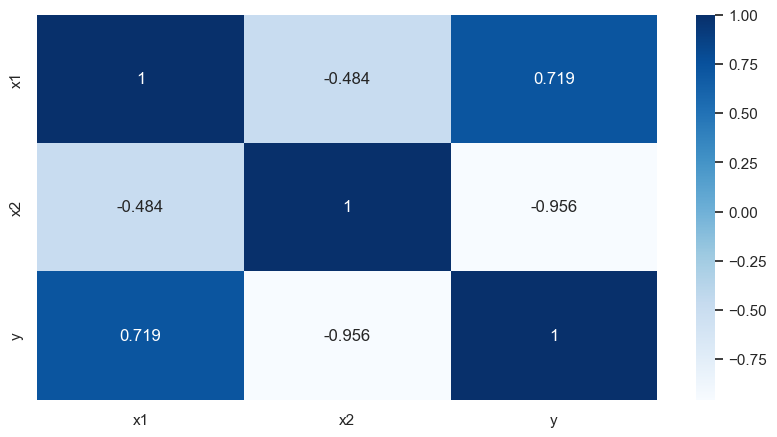

In [10]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.set_theme(style='white')
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.3g')

In [11]:
class Linear_regression():
    
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # Model Training Function
    def fit( self, X, Y):
        
        # Number of training example, Number of features
        self.m, self.n = X.shape 
        
        # Weight initialization
        
        self.W = np.zeros( self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Gradient Descent Learning    
        for i in range(self.iterations):
            self.update_weights()
        return self
    
    # Function to update weights in Gradient Descent
    def update_weights(self):
        Y_pred = self.predict( self.X)
        
        # Gradient calculations
        dW = - (2 * (self.X.T).dot( self.Y - Y_pred)) / self.m
        db = - 2 * np.sum( self.Y - Y_pred) / self.m
        
        # Weight updates
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        return self
    # Hypthetical Function
    def predict( self, X):
        
        return X.dot( self.W) + self.b
    

In [12]:
model = Linear_regression(learning_rate = 0.001, iterations = 10000)
model.fit(X, y)
h_hat = model.predict(X)
print(f'W={model.W}')
print(f'b={model.b}')
mae = mean_absolute_error(y, h_hat)
mse = mean_squared_error(y, h_hat)
rmse = np.sqrt(mse)
print(f'MAE = {mae:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}')

W=[ 2.05887805 -2.96834798]
b=0.19375518396883581
MAE = 0.1488, MSE = 0.0392, RMSE = 0.1980


In [13]:
model = LinearRegression()
model.fit(X, y)
h_hat = model.predict(X)
mae = mean_absolute_error(y, h_hat)
mse = mean_squared_error(y, h_hat)
rmse = np.sqrt(mse)
print(f'MAE = {mae:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}')
print("w = " + str(np.round(model.coef_, 3)))
print("w0 = " + str(np.round(model.intercept_, 3)))
print("R^2: %.5f" % model.score(X,y))

MAE = 0.1421, MSE = 0.0388, RMSE = 0.1971
w = [ 2.046 -2.975]
w0 = 0.292
R^2: 0.99955
